In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl


mpl.rcParams.update({
    'font.family':          'sans-serif',
    'font.sans-serif':      ['Arial'],
    'mathtext.fontset':     'custom',
    'mathtext.rm':          'Arial',
    'mathtext.it':          'Arial:italic',
    'mathtext.bf':          'Arial:bold',
    'mathtext.cal':         'Arial',        # for calligraphic if you like
})

In [102]:
df=pd.read_csv(r'~\Arab Spring Paper\Arab Spring Code\Supp-Material\Attention\Topics of attention AS\final_analysis_topics.csv')


In [104]:

selected_topics = [
    "Turkey’s Regional Role",
   'Gulf monarchies: Saudi',
    "Refugees",
    "Social Media",
    'Islamist parties',
    "Women’s Rights",
    "Oil & Financial Markets",
    'EU Policy & Migration'
]
df=df[df['Topic'].isin(selected_topics)]
df['Topic']=df['Topic'].apply(lambda x: x.replace("Gulf monarchies: Saudi", "Gulf monarchies"))

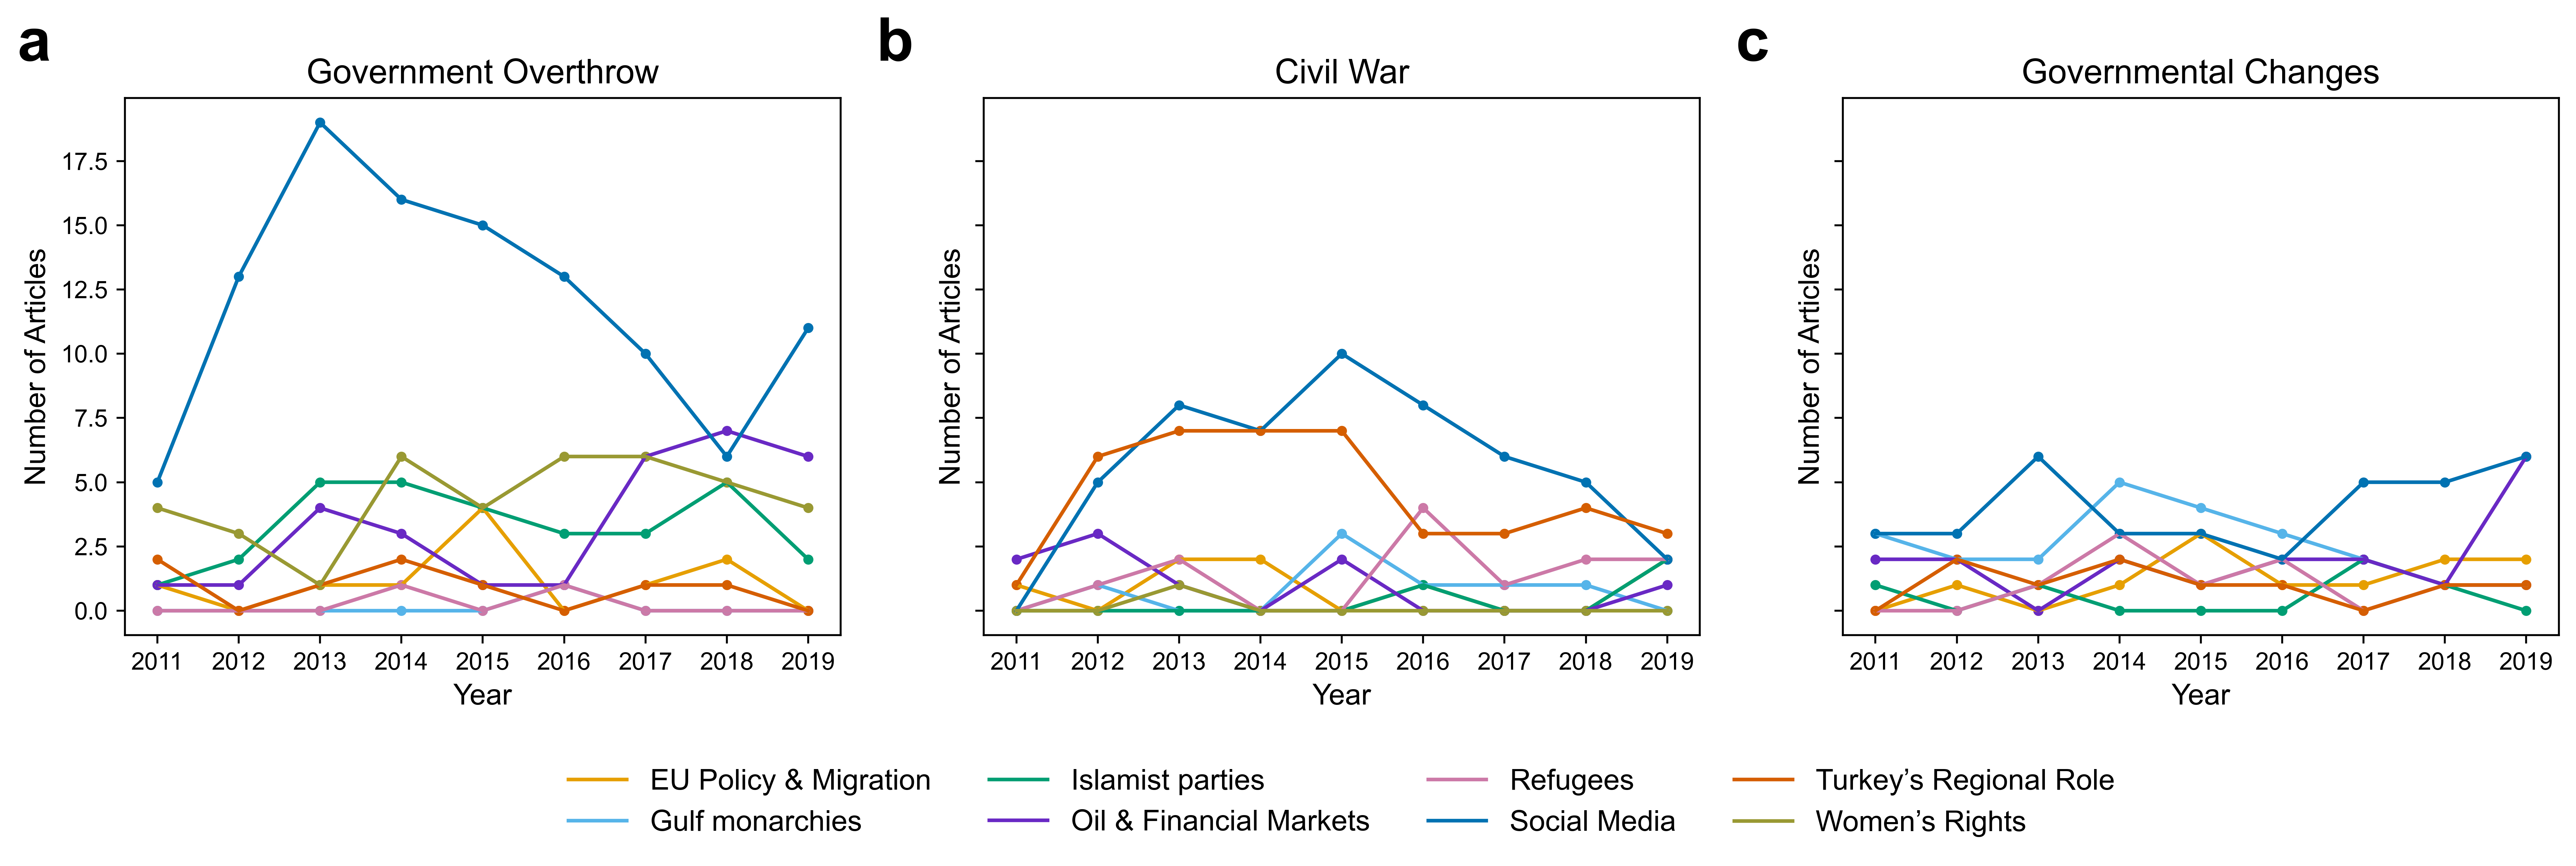

In [105]:
fig, ax=plt.subplots(nrows=1, ncols=3, figsize=(18, 4), sharex=True, sharey=True, dpi=500)
groups=['GO', 'CW', 'GC']
CB_COLORS = [
    "#E69F00",  # Orange
    "#56B4E9",  # Sky Blue
    "#009E73",  # Bluish Green
    "#6929C4",  # Purple 70
    "#CC79A7",  # Reddish Purple

    "#0072B2",  # Blue
    "#D55E00",  # Vermillion
    # Three additional color‑blind‑friendly hues from Paul Tol’s “Muted” scheme:
    "#999933",  # Teal
    "#8A3800",  # Magenta 50
    "#882255",  # Wine (added),
    '#000000'
]
for  group, group_tag, plot_tag in zip( groups, ['Government Overthrow','Civil War', 'Governmental Changes'], ['a', 'b', 'c']):
    to_plot=df[df['Group']==group].groupby(['Topic', 'Year']).count().reset_index()
    to_plot=to_plot[['Topic', 'Year', 'Title']].rename(columns={'Title':'Frequency'})
    to_plot_topics=sorted(to_plot['Topic'].unique())
    colors = {topic: color for topic, color in zip(to_plot_topics, CB_COLORS)}
    for topic in to_plot_topics:
        data=to_plot[to_plot['Topic']==topic]
        years = list(range(2011, 2020))

        # reindex with full range, filling missing with 0
        data = (
            data.set_index("Year")
            .reindex(years, fill_value=0)
            .reset_index()
            .rename(columns={"index": "Year"})
        )

        ax[groups.index(group)].plot(data['Year'], data['Frequency'], label=topic, color=colors[topic])
        ax[groups.index(group)].scatter(data['Year'], data['Frequency'], color=colors[topic], s=10)
    ax[groups.index(group)].set_title(f'{group_tag}', fontsize=14)  
    ax[groups.index(group)].set_xlabel('Year', fontsize=12)
    ax[groups.index(group)].set_ylabel('Number of Articles', fontsize=12)
    ax[groups.index(group)].text(-0.15, 1.15, plot_tag, transform=ax[groups.index(group)].transAxes, verticalalignment='top', fontsize=25,fontweight='bold')


ax[0].legend(
        frameon=False,
        loc='upper center',
        bbox_to_anchor=(1.7, -0.2),
        ncol=4,  # adjust depending on how many items you expect
        fontsize=12
    )

plt.savefig(r'Topics_of_attention_AS.pdf', bbox_inches='tight')